<a href="https://colab.research.google.com/github/ev1025/CodeStates-Project2/blob/main/%EC%98%88%EB%A7%A4%EC%88%98%EC%9A%94%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 목표(기업)

### 결과 및 측정 데이터 분석 및 예매 예측

1. 지난 경기 관람 만족도 연계 다음경기 예매 예측
   - 이겼다
   - 이겼지만 마음에 들지 않음
   - 무승부
   - 졌지만 잘싸웠다
   - 졌다   
2. 관람여부와 경기결과 및 순위에 따른 예매 예측(+고급좌석 예매 예측)
   - **관람**
      - 승리
        - 상위
        - 중위
        - 하위
      - 패배
        - 상위
        - 중위
        - 하위
   - **비관람**
      - 승리
        - 상위
        - 중위
        - 하위
      - 패배
        - 상위
        - 중위
        - 하위
     

### 예매 촉진 지표 분석 및 적정 프로모션 수준 예측

1. 경기 결과 및 순위에 따른 가격 인상,할인,프로모션 진행의 실효성
   - 가격 인상
   - 가격 할인
   - 프로모션
2. 경기 관람 만족도에 따른 분석 및 예측 모델링
   - 만족도
      - 경기장 시설(청결도, 온도조절)
      - 경기장 운영 
      - 경기내용
      - 음식의 맛
      - 관람료

### 예매 촉진을 위한 프로모션 대상자 세분화 및 촉진 방법 제안

1. 고객 세분화 및 액션아이템 고안
  - 고객 세분화
    - 적절한 할인율
    - 적절한 프로모션
    - 고급좌석이용고객 별도 세분화

### 가설

- 지난경기의 관람 여부, 순위, 경기결과에 따라 예매 수가 다를 것이다.
- 위의 가설에 해당하지 않는 고객군이 존재 할 것이다.
- 예매유도에 반응하는 고객군이 있을 것이다.
- 고급좌석 이용을 예측할 수 있다.

# 나의 생각

### 기업에서 원하는 것

- 관람여부, 경기결과, 순위가 예매에 미치는 영향 분석 및 모델링
- 마케팅에 반응하는 고객층을 찾아서 수익 극대화
- 고급좌석 이용률을 높이는 방법에 대한 고민

### 가설

- 일반팬과 골수팬을 분류할 수 있다.
- 경기의 승패는 예매와 관련이 없을 것이다.
- 관람이 뜸한 충성고객을 찾아서 다시 불러들일 수 있다.

### 프로모션(아이디어)

- 질 것 같은 경기일 수록 응원의 힘으로 승리를 이끌어야 한다.   
=> 전력상 패배가 예상되는 팀의 좌석을 예매한 고객에 한해서 그 경기가 승리할 경우 고급좌석 예매 할인 쿠폰 제공

- 승부예측    
경기의 스코어를 맞추는 고객에 한하여 쿠폰지급



# 데이터

## 데이터 전처리

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/더케이/membership.csv')       # 고객테이블
df2 = pd.read_csv('/content/drive/MyDrive/더케이/reserve_ticket_.csv')  # 티켓
df3 = pd.read_excel('/content/drive/MyDrive/더케이/d95e264436cf42de.xlsx',engine = 'openpyxl',names=['game_date','rank'], header=None) # 일자별 순위, (excel파일 여는방법)
df5 = pd.read_csv('/content/drive/MyDrive/더케이/survey_complete_.csv') # 설문1
df6 = pd.read_csv('/content/drive/MyDrive/더케이/survey_item.csv')      # 설문2
df7 = pd.read_csv('/content/drive/MyDrive/더케이/survey_main.csv')      # 설문3
df8 = pd.read_csv('/content/drive/MyDrive/더케이/survey_result.csv')    # 설문4


In [4]:
# df4 경기결과 및 관중 수 
# xml 여는법 다시 찾아보기
# 인코딩 깨질 때는 encode -> decode 다시 할 것
import xml.etree.ElementTree as ET
tree = ET.parse('/content/drive/MyDrive/더케이/schedule2022120221019212245.xml', parser=ET.XMLParser(encoding='latin1')) # multi encode오류 날 때 'latin-1',  'iso-8859-5', 'cp1252'
root = tree.getroot()

empty_list = []
for i in root: # i.tag , i.attrib 알아보기
    i.attrib['yoil'] = i.attrib['yoil'].encode('latin-1').decode('euc-kr')
    i.attrib['meet_name'] = i.attrib['meet_name'].encode('latin-1').decode('euc-kr')
    i.attrib['home_team_name'] = i.attrib['home_team_name'].encode('latin-1').decode('euc-kr')
    i.attrib['away_team_name'] = i.attrib['away_team_name'].encode('latin-1').decode('euc-kr')
    i.attrib['game_type_name'] = i.attrib['game_type_name'].encode('latin-1').decode('euc-kr')
    i.attrib['field_name'] = i.attrib['field_name'].encode('latin-1').decode('euc-kr')
    empty_list.append(i.attrib)

In [5]:
# 리스트 안의 dict[{}]를 데이터프레임으로 만들기
empty_df = pd.DataFrame() # 빈 데이터프레임 만들기
for i in empty_list:
    i = pd.DataFrame.from_dict(i, orient='index').T # dict를 dataframe으로 만들기
    empty_df = empty_df.append(i)                   # 각 dataframe을 빈데이터프레임에 추가
df4 = empty_df.reset_index(drop=True)

In [6]:
# 잘 저장됐는지 확인
# empty_df.to_csv('/content/drive/MyDrive/더케이/schedule.csv', index=False)
# a = pd.read_csv('/content/drive/MyDrive/더케이/schedule.csv', parse_dates=["game_date"])

In [7]:
df1

,MB_IDX,MB_AGE,zipcode,job,favorite_idx
0,112,1983,1439.0,NaN,무고사
1,137,1984,22825.0,회사원(사무직/연구직),정혁
2,153,1959,21527.0,자영업자,김도혁
3,180,1984,4941.0,NaN,아길라르
4,208,1993,23025.0,교사,김도혁
...,...,...,...,...,...
15873,151991,1975,22166.0,교사,송시우
15874,151992,2000,21400.0,기타,김보섭
15875,151993,1981,10070.0,회사원(사무직/연구직),에르난데스
15876,151994,2006,21074.0,학생(초/중/고),에르난데스


In [8]:
df2.tail()

,reserve_no,membership_no,reserve_datetime,cancel_datetime,game_date,game_time,match_info,reserve_state_code,reserve_detail_no,ticket_no,product_grade_name,product_denomination_name,seat_Attribute_4,seat_Attribute_5,seat_Attribute_6,cancel_yn,detail_cancel_date_time
44,1411451556,101741,NaN,2019-03-01 16:32:44,2019-03-02,14:00:00,[하나 원큐 K 리그1 2019] 인천 유나이티드 vs 제주 유나이티드,ALL_CANCEL,1,1049283590,W 지정석,성인(예매),W4구역,O열,3번,Y,2019-03-01 16:32:44
45,1411451556,101741,NaN,2019-03-01 16:32:44,2019-03-02,14:00:00,[하나 원큐 K 리그1 2019] 인천 유나이티드 vs 제주 유나이티드,ALL_CANCEL,2,1049283591,W 지정석,성인(예매),W4구역,O열,4번,Y,2019-03-01 16:32:44
46,1411559297,101868,NaN,2019-02-28 19:57:20,2019-03-02,14:00:00,[하나 원큐 K 리그1 2019] 인천 유나이티드 vs 제주 유나이티드,ALL_CANCEL,1,1049356729,W 지정석,예매권,W2구역,L열,16번,Y,2019-02-28 19:57:20
47,1411559297,101868,NaN,2019-02-28 19:57:20,2019-03-02,14:00:00,[하나 원큐 K 리그1 2019] 인천 유나이티드 vs 제주 유나이티드,ALL_CANCEL,2,1049356730,W 지정석,예매권,W2구역,L열,17번,Y,2019-02-28 19:57:20
48,1411559297,101868,NaN,2019-02-28 19:57:20,2019-03-02,14:00:00,[하나 원큐 K 리그1 2019] 인천 유나이티드 vs 제주 유나이티드,ALL_CANCEL,3,1049356731,W 지정석,예매권,W2구역,L열,18번,Y,2019-02-28 19:57:20


In [9]:
df2 # 티켓 예매
df2.iloc[0][6] # 복사해서 추출할것
# df2[df2['match_info'] == '[하나 원큐 K 리그1 2019] 인천 유나이티드 vs 제주 유나이티드']

'[하나 원큐 K 리그1 2019] 인천 유나이티드 vs 제주 유나이티드'

In [10]:
# from category_encoders import OrdinalEncoder

# enc1 = OrdinalEncoder(cols = 'color')
# df2 = enc1.fit_transform(df2)

In [11]:
df3 # 일자별 순위
year_rank = df3[df3['game_date'] > '2022.02.01'].reset_index(drop=True)
# year_rank

In [12]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   meet_year       228 non-null    object
 1   meet_seq        228 non-null    object
 2   meet_name       228 non-null    object
 3   game_id         228 non-null    object
 4   game_date       228 non-null    object
 5   yoil            228 non-null    object
 6   game_time       228 non-null    object
 7   home_team       228 non-null    object
 8   home_team_name  228 non-null    object
 9   home_team_goal  222 non-null    object
 10  home_team_tk    222 non-null    object
 11  away_team       228 non-null    object
 12  away_team_name  228 non-null    object
 13  away_team_goal  222 non-null    object
 14  away_team_tk    222 non-null    object
 15  field_id        228 non-null    object
 16  field_name      228 non-null    object
 17  game_type       228 non-null    object
 18  game_type_

In [13]:
df4 # 2022년 경기 일정

,meet_year,meet_seq,meet_name,game_id,game_date,yoil,game_time,home_team,home_team_name,home_team_goal,home_team_tk,away_team,away_team_name,away_team_goal,away_team_tk,field_id,field_name,game_type,game_type_name,audience
0,2022,1,하나원큐 K리그1 2022,1,2022/02/19,토,14:00,K05,전북,1,0,K29,수원FC,0,0,71,전주W,21,스플릿일반,7715
1,2022,1,하나원큐 K리그1 2022,2,2022/02/19,토,16:30,K17,대구,0,0,K09,서울,2,0,114,대구전,21,스플릿일반,8082
2,2022,1,하나원큐 K리그1 2022,3,2022/02/19,토,16:30,K18,인천,1,0,K02,수원,0,0,95,인천,21,스플릿일반,5382
3,2022,1,하나원큐 K리그1 2022,4,2022/02/20,일,14:00,K04,제주,0,0,K03,포항,3,0,85,제주W,21,스플릿일반,2514
4,2022,1,하나원큐 K리그1 2022,5,2022/02/20,일,14:00,K21,강원,2,0,K08,성남,0,0,25,강릉,21,스플릿일반,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2022,1,하나원큐 K리그1 2022,224,2022/10/22,토,15:00,K35,김천,NaN,NaN,K02,수원,NaN,NaN,118,김천,24,파이널B,0
224,2022,1,하나원큐 K리그1 2022,225,2022/10/22,토,15:00,K08,성남,NaN,NaN,K17,대구,NaN,NaN,84,탄천,24,파이널B,0
225,2022,1,하나원큐 K리그1 2022,226,2022/10/23,일,15:00,K01,울산,NaN,NaN,K04,제주,NaN,NaN,68,문수,23,파이널A,0
226,2022,1,하나원큐 K리그1 2022,227,2022/10/23,일,15:00,K05,전북,NaN,NaN,K18,인천,NaN,NaN,71,전주W,23,파이널A,0


In [14]:
# k리그는 12팀으로 진행됨, k리그 팀목록
abc = df4[['home_team','home_team_name','away_team','away_team_name']].sort_values(by='home_team').reset_index(drop=True)
home_num = {abc.loc[i][0]:abc.loc[i][1] for i in range(len(abc))}
away_num = {abc.loc[i][2]:abc.loc[i][3] for i in range(len(abc))}
all_num = dict(home_num,**away_num)

**tk(승부차기) 컬럼 삭제, 연도와 각 팀, 경기장의 id번호 삭제**

In [15]:
df4['home_team_tk'].unique()

array(['0', nan], dtype=object)

In [16]:
df4['away_team_tk'].unique()

array(['0', nan], dtype=object)

In [17]:
df4.drop(columns = ['home_team_tk','away_team_tk','meet_year','meet_seq','meet_name','home_team','away_team','field_id'],inplace=True,)

In [18]:
# 숫자데이터 숫자로 변경
df4[['game_id','audience']] = df4[['game_id','audience']].astype(int)

# 날짜데이터 datetime변경
df4['game_date'] = pd.to_datetime(df4['game_date'])

df4['yoil'] = df4['yoil'].replace({'월':0,'화':1,'수':2,'목':3,'금':4,'토':5,'일':6})

## 데이터 분석

### 랭킹데이터 + 직전 경기 승패 (df3+df4)

In [19]:
# 경기결과 + 순위
merge_df = pd.merge(year_rank, df4, how='inner',on='game_date')

# 인천 경기장 경기
home_game = merge_df[merge_df['field_name']=='인천']  

# 인천 경기
home_team = merge_df[(merge_df['home_team_name']=='인천') | (merge_df['away_team_name']=='인천')].reset_index()

In [20]:
# result 컬럼 직전 경기 승, 무, 패 기록
home_team['result'] = 0
for i in range(len(home_team)):
    if (home_team['home_team_name'][i]=='인천') and (home_team['home_team_goal'][i]> home_team['away_team_goal'][i]):
        home_team['result'][i] = '승리'
    elif (home_team['away_team_name'][i]=='인천') and (home_team['home_team_goal'][i]< home_team['away_team_goal'][i]):
        home_team['result'][i] = '승리'
    elif (home_team['away_team_name'][i]=='인천') and (home_team['home_team_goal'][i] == home_team['away_team_goal'][i]):
        home_team['result'][i] = '무승부'
    else:
        home_team['result'][i] = '패배'
home_team['result'] = home_team.result.shift()

<ipython-input-20-24c23529ac47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_team['result'][i] = '승리'
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
# 인천 경기장만 추출
diff = home_team[home_team['field_name'] == '인천']

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_

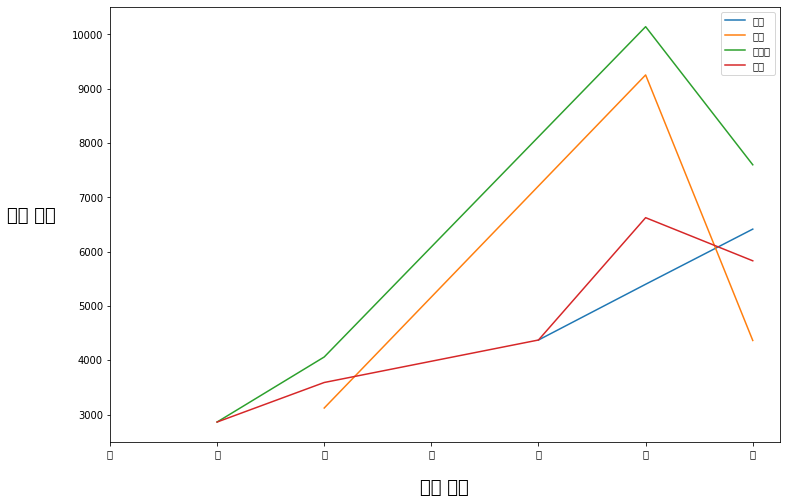

In [22]:
# 인천 경기장 승,무,패에 따른 그래프
result = list(diff['result'].unique())
del result[0]

plt.figure(figsize=(12,8))
for i in result:
    plt.plot(diff[diff['result']==i].groupby('yoil')['audience'].mean())
plt.plot(diff.groupby('yoil')['audience'].mean())
plt.ylabel('평균 인원', fontsize=18, labelpad=40, rotation='horizontal')
plt.xlabel('경기 요일', fontsize=18, labelpad=20)
plt.xticks(range(7),['월','화','수','목','금','토','일'])
plt.legend(['승리','패배','무승부','평균'])
plt.show();


### 경기 결과 및 관객 수 (df4)

**요일별 시간별 경기 수**

In [23]:
# 한글 그래프 폰트(런타임재시작)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [24]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)

In [25]:
# 요일별,시간대별 히트맵
data = df4.pivot_table(index='yoil', columns='game_time', values='game_id', aggfunc=['count']) # aggfunc는 값에 적용해줄 함수
data.index = ['월','화','수','목','금','토','일']
data.columns = [i[1] for i in data.columns]

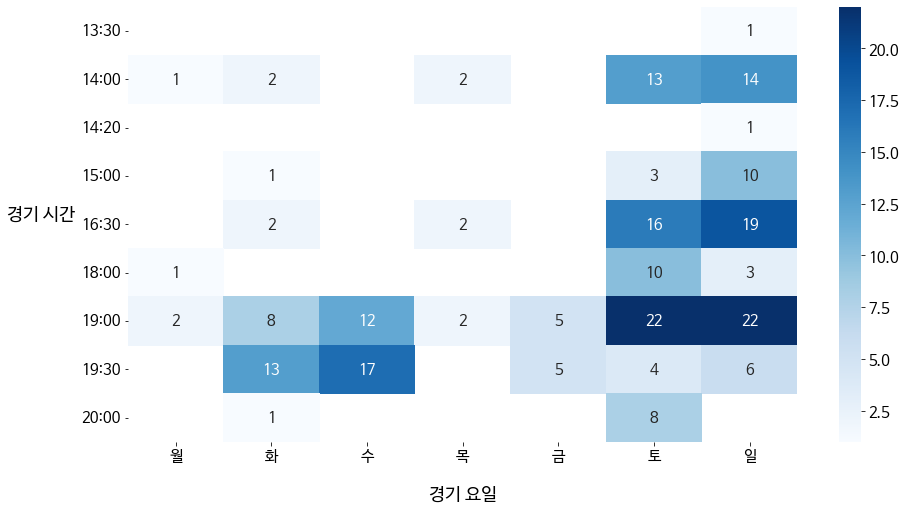

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(data.T,cmap='Blues', annot=True)
plt.yticks(rotation='horizontal')
plt.ylabel('경기 시간', fontsize=18, labelpad=40, rotation='horizontal')
plt.xlabel('경기 요일', fontsize=18, labelpad=20)
plt.show();

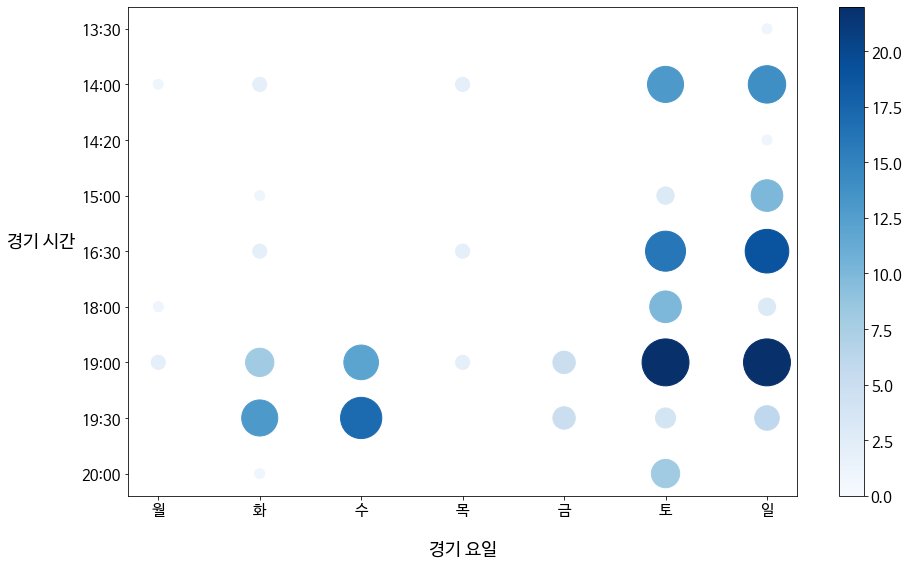

In [27]:
# 요일과 시간별 경기 수
group_day = df4.groupby(['yoil','game_time'])[['game_id']].count()
group_day.reset_index(inplace=True)

# 데이터가 월화수목금토일 순으로 정렬되도록
group_day.sort_values(by='yoil',inplace=True)
group_day.sort_values(by='game_time',inplace=True,ascending=False)


plt.figure(figsize=(15,9))
plt.scatter(group_day.yoil,
            group_day.game_time,
            s = group_day.game_id*100,
            c = group_day.game_id,
            cmap='Blues',
            vmin =0,
            vmax = group_day.game_id.max())
plt.xticks(range(group_day['yoil'].nunique()),['월','화','수','목','금','토','일'])
plt.colorbar()
plt.ylabel('경기 시간', fontsize=18, labelpad=40, rotation='horizontal')
plt.xlabel('경기 요일', fontsize=18, labelpad=20)
plt.show();

**요일별 시간별 관객 수**

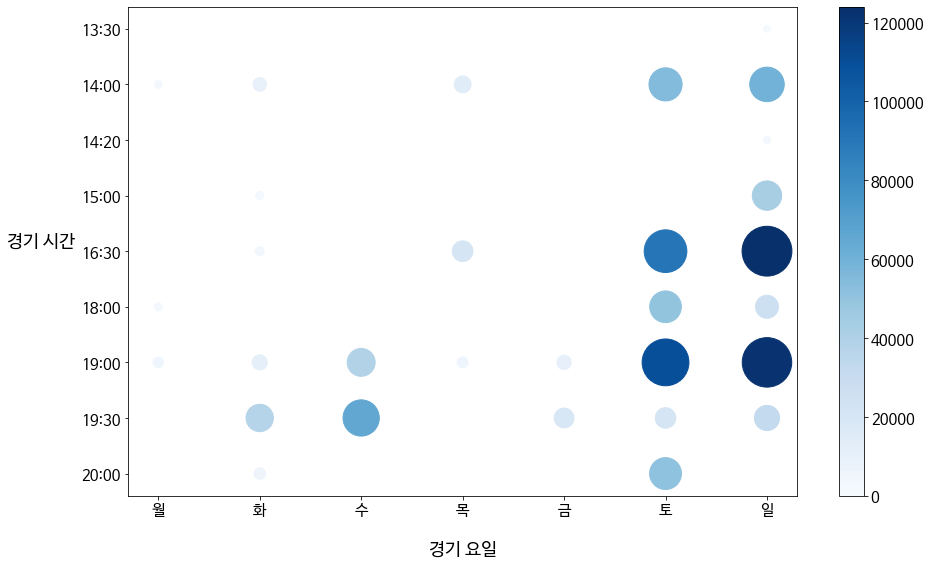

In [28]:
# 요일,시간별 관객수
group_day2 = df4.groupby(['yoil','game_time'])[['audience']].sum()
group_day2.reset_index(inplace=True)

# 데이터가 월화수목금토일 순으로 정렬되도록
group_day2['yoil'].replace({'월':0,'화':1,'수':2,'목':3,'금':4,'토':5,'일':6},inplace=True)
group_day2.sort_values(by='yoil',inplace=True)
group_day2.sort_values(by='game_time',inplace=True,ascending=False)


plt.figure(figsize=(15,9))
plt.scatter(group_day2.yoil,
            group_day2.game_time,
            s = group_day2.audience/50,
            c = group_day2.audience,
            cmap='Blues',
            vmin =0,
            vmax = group_day2.audience.max())
plt.xticks(range(group_day2['yoil'].nunique()),['월','화','수','목','금','토','일'])
plt.colorbar()
plt.ylabel('경기 시간', fontsize=18, labelpad=40, rotation='horizontal')
plt.xlabel('경기 요일', fontsize=18, labelpad=20)
plt.show();